# Inception Model V3
* source: https://keras.io/api/applications/#usage-examples-for-image-classification-models, https://keras.io/api/applications/inceptionv3/

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from numba import cuda  # https://stackoverflow.com/a/52354865/6476994
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from datetime import datetime

In [2]:
# allows all images to be displayed at once (else only displays the last call to plt.imshow())
# https://stackoverflow.com/a/41210974
def displayImage(image, caption = None, colour = None) -> None:
    plt.figure()
    if(colour != None):
        plt.imshow(image, cmap=colour)
    else:
        plt.imshow(image)
        
    if(caption != None):
        # display caption below picture (https://stackoverflow.com/a/51486361)
        plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)

In [3]:
# free up GPU if it didn't after the last run
cuda.select_device(0)
cuda.close()

# Read in dataset

* first argument is the `using_batch_generator` flag
* second argument is `do_preprocessing`, which will perform image manipulations for the purposes of enhancing training performance
* all other arguments are the datasets - e.g., a folder ('20160724_July') with additional folders ('BB01', 'BB02', ..., 'BBXY'), each containing a set of images)

In [4]:
%run readInDataset.py false false 20160724_July

args: ['readInDataset.py', 'false', 'false', '20160724_July']
using_batch_generator? False
doing pre-processing? False
dataset_names: ['20160724_July']
reading in images and labels for dataset: 20160724_July
all_folders_for_curr_dataset: ['BB01', 'BB02', 'BB03', 'BB04', 'BB05', 'BB06', 'BB07', 'BB08', 'BB09', 'BB10', 'BB11', 'BB12', 'BB13', 'BB14', 'BB15', 'BB16', 'BB17', 'BB18', 'BB19', 'BB20', 'BB21', 'BB22', 'BB23', 'BB24', 'BB25', 'BB26', 'BB27', 'BB28', 'BB29', 'BB30', 'BB31', 'BB32', 'BB33', 'BB34', 'BB35', 'BB36']
reading in labels for subset: BB01
returning labelList of length: 285
reading in images for subset: BB01
all_image_filenames length: 285
done current subset
reading in labels for subset: BB02
returning labelList of length: 45
reading in images for subset: BB02
all_image_filenames length: 45
done current subset
reading in labels for subset: BB03
returning labelList of length: 230
reading in images for subset: BB03
all_image_filenames length: 230
done current subset
read

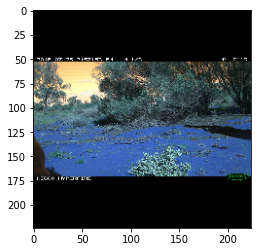

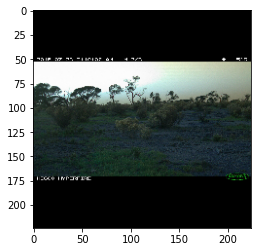

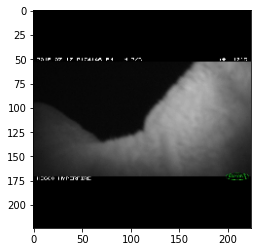

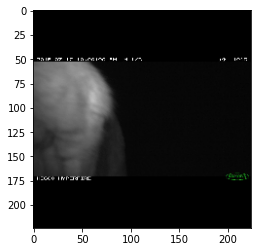

In [5]:
num_len_train = int(0.8 * len(training_images))

ttraining_images = training_images[:num_len_train]
ttraining_labels = training_labels[:num_len_train]

valid_images = training_images[num_len_train:]
valid_labels = training_labels[num_len_train:]

training_images = ttraining_images
training_labels = ttraining_labels

# show a few samples
displayImage(training_images[0])
displayImage(training_images[10])
displayImage(training_images[100])
displayImage(training_images[1000])

In [6]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- based on number of classes
predictions = Dense(len(classes), activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit(training_images, training_labels, batch_size=128,
          validation_data=(valid_images, valid_labels),
          epochs = 10)

2022-06-05 09:23:26.644681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 09:23:26.651417: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 09:23:26.651595: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-05 09:23:26.652234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/10


2022-06-05 09:23:31.157812: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-06-05 09:23:31.547977: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


35/35 [==============================] - 18s 348ms/step - loss: 62.2806 - val_loss: 23.0743
Epoch 2/10
35/35 [==============================] - 7s 205ms/step - loss: 24.9689 - val_loss: 25.7326
Epoch 3/10
35/35 [==============================] - 7s 206ms/step - loss: 18.9600 - val_loss: 11.5319
Epoch 4/10
35/35 [==============================] - 7s 207ms/step - loss: 11.6255 - val_loss: 5.2179
Epoch 5/10
35/35 [==============================] - 7s 206ms/step - loss: 7.9206 - val_loss: 11.5198
Epoch 6/10
35/35 [==============================] - 7s 206ms/step - loss: 5.8568 - val_loss: 4.4136
Epoch 7/10
35/35 [==============================] - 7s 207ms/step - loss: 3.8167 - val_loss: 4.9266
Epoch 8/10
35/35 [==============================] - 7s 207ms/step - loss: 2.6614 - val_loss: 2.9175
Epoch 9/10
35/35 [==============================] - 7s 207ms/step - loss: 1.8213 - val_loss: 1.6086
Epoch 10/10
35/35 [==============================] - 7s 208ms/step - loss: 1.2173 - val_loss: 0.9019


In [7]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(training_images, training_labels, batch_size=128,
          validation_data=(valid_images, valid_labels),
          epochs = 90)

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

/home/luke/.local/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
2022-06-05 09:24:51.181137: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 673161216 exceeds 10% of free system memory.


Epoch 1/90


2022-06-05 09:24:51.408614: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 673161216 exceeds 10% of free system memory.


35/35 [==============================] - 13s 281ms/step - loss: 1.5357 - val_loss: 1.3829
Epoch 2/90
35/35 [==============================] - 8s 228ms/step - loss: 1.3342 - val_loss: 1.3011
Epoch 3/90
35/35 [==============================] - 8s 227ms/step - loss: 1.2270 - val_loss: 1.2424
Epoch 4/90
35/35 [==============================] - 8s 229ms/step - loss: 1.1603 - val_loss: 1.1950
Epoch 5/90
35/35 [==============================] - 8s 230ms/step - loss: 1.1135 - val_loss: 1.1538
Epoch 6/90
35/35 [==============================] - 8s 228ms/step - loss: 1.0761 - val_loss: 1.1146
Epoch 7/90
35/35 [==============================] - 8s 229ms/step - loss: 1.0475 - val_loss: 1.0787
Epoch 8/90
35/35 [==============================] - 8s 228ms/step - loss: 1.0201 - val_loss: 1.0538
Epoch 9/90
35/35 [==============================] - 8s 230ms/step - loss: 0.9966 - val_loss: 1.0280
Epoch 10/90
35/35 [==============================] - 8s 229ms/step - loss: 0.9732 - val_loss: 1.0054
Epoch 11/

## Use test set to assess trained model's performance

### Evaluate

In [8]:
print('test_images shape: {}'.format(test_images.shape))
print('test_labels shape: {}'.format(test_labels.shape))

results = model.evaluate(test_images,test_labels)
print('results: {}'.format(results))

test_images shape: (1398, 224, 224, 3)
test_labels shape: (1398, 10)
44/44 [==============================] - 3s 59ms/step - loss: 0.4305
results: 0.43051111698150635


### Predict and print classification report

In [9]:
predictions = (model.predict(test_images) > 0.5).astype("int32")

44/44 [==============================] - 2s 41ms/step


In [10]:
print("test_classes: {}".format(test_classes))
print("train classes count: {}".format(counter_test))
# classification_report uses alphabetic ordering of the classes, so to match the encoded labels to the target_names, provide a sortest list of classes
# https://stackoverflow.com/a/48495303
sorted_test_classes = sorted(test_classes)
print(classification_report(test_labels, predictions, target_names=sorted_test_classes))

test_classes: ['Kangaroo', 'Empty photo', 'Emu', 'Human Presense/Deployment', 'Dog', 'Cat', 'Fox', 'Other', 'Rabbit', 'Bird']
train classes count: Counter({'Kangaroo': 823, 'Empty photo': 269, 'Emu': 121, 'Human Presense/Deployment': 120, 'Fox': 29, 'Cat': 20, 'Rabbit': 8, 'Other': 4, 'Bird': 3, 'Dog': 1})
                           precision    recall  f1-score   support

                     Bird       0.00      0.00      0.00         3
                      Cat       0.00      0.00      0.00        20
                      Dog       0.00      0.00      0.00         1
              Empty photo       0.81      0.74      0.77       269
                      Emu       0.93      0.83      0.87       121
                      Fox       0.00      0.00      0.00        29
Human Presense/Deployment       0.89      0.58      0.70       120
                 Kangaroo       0.94      0.96      0.95       823
                    Other       0.00      0.00      0.00         4
                   Ra

/home/luke/miniconda3/envs/cv-project-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/luke/miniconda3/envs/cv-project-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion matrix

In [11]:
matrix = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
print(matrix)

[[  3   0   0   0   0   0   0   0   0   0]
 [ 11   0   0   4   0   0   0   5   0   0]
 [  1   0   0   0   0   0   0   0   0   0]
 [ 26   0   0 200   3   0   6  34   0   0]
 [ 12   0   0   7 100   0   2   0   0   0]
 [ 19   0   0   6   0   0   0   4   0   0]
 [ 32   0   0   6   5   0  70   7   0   0]
 [ 12   0   0  18   0   0   1 792   0   0]
 [  0   0   0   1   0   0   0   3   0   0]
 [  2   0   0   6   0   0   0   0   0   0]]


### Accuracy

In [12]:
acc = accuracy_score(test_labels, predictions)
print(acc)

0.8311874105865522


## Save the model
* use the current date/time so we can keep incrementation progress of the model as we re-run it

In [13]:
now = datetime.now()
dt_string = now.strftime('%d-%m-%Y_%H:%M:%S')
print("saving model as: 'InceptionV3-{}.h5'.'".format(dt_string))

model.save('saved_models/InceptionV3-{}.h5'.format(dt_string))

saving model as: 'InceptionV3-05-06-2022_09:36:30.h5'.'


## Free up the GPU's memory

In [14]:
cuda.select_device(0)
cuda.close()